##  DESAFIO 1 
Importar librerías y .csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = (45,30)
plt.style.use('seaborn')

In [16]:
df = pd.read_csv('nations.csv', encoding ='latin-1')

In [17]:
df.head()

Unnamed: 0       country  region           gdp    school      adfert  \
0           1       Algeria  Africa   7300.399902  6.716667    7.300000   
1           2         Benin  Africa   1338.800049  3.100000  111.699997   
2           3      Botswana  Africa  12307.400391  8.600000   52.099998   
3           4  Burkina Faso  Africa   1063.400024  1.300000  124.800003   
4           5       Burundi  Africa    349.200012  2.483333   18.600000   

   chldmort       life       pop      urban  femlab   literacy   co2  \
0     34.75  72.316666  34172236  64.933334  0.4522  72.599998  15.0   
1    122.75  54.733334   8237634  41.000000  0.8482  41.700001   1.2   
2     60.25  52.250000   1941233  59.250000  0.8870  84.099998   9.2   
3    170.50  53.783333  15308383  23.583334  0.8584  23.600000   0.2   
4    168.50  48.866665   7821783  10.250000  1.0344  66.599998   0.1   

        gini  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4  33.299999

In [18]:
df=df.drop(columns='Unnamed: 0') #eliminando columna Unnamed:0

In [19]:
df.head()

country  region           gdp    school      adfert  chldmort  \
0       Algeria  Africa   7300.399902  6.716667    7.300000     34.75   
1         Benin  Africa   1338.800049  3.100000  111.699997    122.75   
2      Botswana  Africa  12307.400391  8.600000   52.099998     60.25   
3  Burkina Faso  Africa   1063.400024  1.300000  124.800003    170.50   
4       Burundi  Africa    349.200012  2.483333   18.600000    168.50   

        life       pop      urban  femlab   literacy   co2       gini  
0  72.316666  34172236  64.933334  0.4522  72.599998  15.0        NaN  
1  54.733334   8237634  41.000000  0.8482  41.700001   1.2        NaN  
2  52.250000   1941233  59.250000  0.8870  84.099998   9.2        NaN  
3  53.783333  15308383  23.583334  0.8584  23.600000   0.2        NaN  
4  48.866665   7821783  10.250000  1.0344  66.599998   0.1  33.299999

# DESAFIO 2
Refactor gráficos matplotlib a seaborn

In [20]:
import seaborn as sns

In [21]:
df['binarize'] = np.where(df['adfert']<df['adfert'].mean(), 'adfert <= 21.88', 'adfer >=21.88')

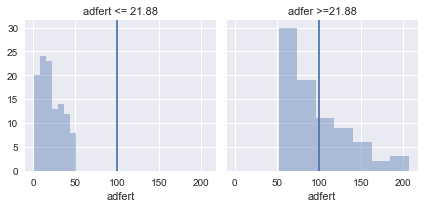

In [22]:
grid = sns.FacetGrid(df, col='binarize', col_wrap=2)
grid = grid.map(sns.distplot, 'adfert', kde=False)
grid.set_titles('{col_name}')
grid.facet_axis(0,0)
plt.axvline(100)
grid.facet_axis(0,1)
plt.axvline(100)

#grid.fig.set.size

In [23]:
ax = sns.boxplot(x='region', y='adfert', data=df)

In [24]:
sns.swarmplot(x='region', y='adfert', data= df )

# DESAFIO 3
Genere un heatmap entre todas las variables
En base a las variables de interés asignadas, comente cuáles son las principales
correlaciones existentes, tomando como criterio de corte aquellas superior a .6


In [25]:
df.corr().dropna() #Tabla de correlacioles + eliminan NaN

gdp    school    adfert  chldmort      life       pop  \
gdp       1.000000  0.573280 -0.517120 -0.516019  0.611219 -0.053251   
school    0.573280  1.000000 -0.675219 -0.772668  0.725207 -0.058784   
adfert   -0.517120 -0.675219  1.000000  0.777416 -0.731787 -0.004868   
chldmort -0.516019 -0.772668  0.777416  1.000000 -0.923563 -0.005432   
life      0.611219  0.725207 -0.731787 -0.923563  1.000000  0.005418   
pop      -0.053251 -0.058784 -0.004868 -0.005432  0.005418  1.000000   
urban     0.656482  0.565080 -0.451075 -0.556266  0.623945 -0.066228   
femlab    0.009827  0.094663  0.032290  0.137984 -0.174210 -0.057245   
literacy  0.442487  0.854910 -0.676430 -0.790070  0.664518 -0.030396   
co2       0.826819  0.416818 -0.437615 -0.416292  0.445990 -0.023302   
gini     -0.079037 -0.201446  0.354003  0.063676 -0.025493 -0.015499   

             urban    femlab  literacy       co2      gini  
gdp       0.656482  0.009827  0.442487  0.826819 -0.079037  
school    0.565080  0.094663  0.854910  0.416818 -0.201446  
adfert   -0.451075  0.032290 -0.676430 -0.437615  0.354003  
chldmort -0.556266  0.137984 -0.790070 -0.416292  0.063676  
life      0.623945 -0.174210  0.664518  0.445990 -0.025493  
pop      -0.066228 -0.057245 -0.030396 -0.023302 -0.015499  
urban     1.000000 -0.165942  0.478254  0.522432  0.138066  
femlab   -0.165942  1.000000 -0.075675 -0.101363 -0.049513  
literacy  0.478254 -0.075675  1.000000  0.349137 -0.028563  
co2       0.522432 -0.101363  0.349137  1.000000 -0.110875  
gini      0.138066 -0.049513 -0.028563 -0.110875  1.000000

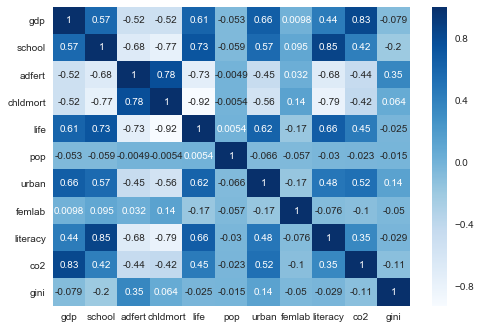

In [26]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)



### Las principales correlaciones existente mayor a 0.6 corresponden a las variables:
##### - Life (Esperanza  de vida al nacer) con GDP (Producto Interno Bruto per cápita, precios 2005) (0.61)
##### - Life Esperanza  de vida al nacer) con School (Promedio años de escolaridad) (0.73)
##### - iteracy  (Tasa de alfabetismo) con school (Promedio años de escolaridad) (0.85)
##### - Iteracy (Tasa de alfabetismo) con life Esperanza  de vida al nacer) (0.66)
##### - Co2 (Toneladas de Co2 mitidas per cápita)   con GDP  (Producto Interno Bruto per cápita, precios 2005) (0.83)
 


 # DESAFIO 4
En base a las principales correlaciones, sepárelas en un
nuevo objeto y calcule la matriz de correlaciones para todas
las regiones

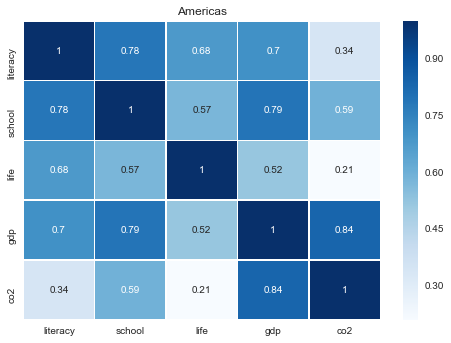

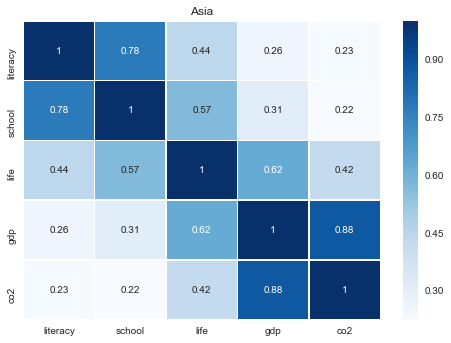

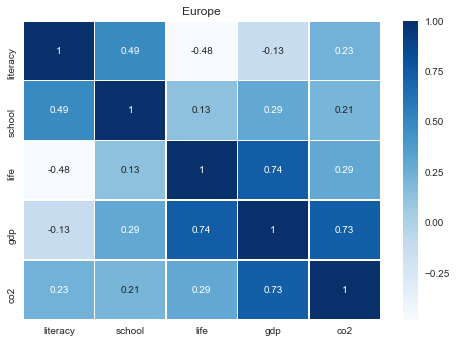

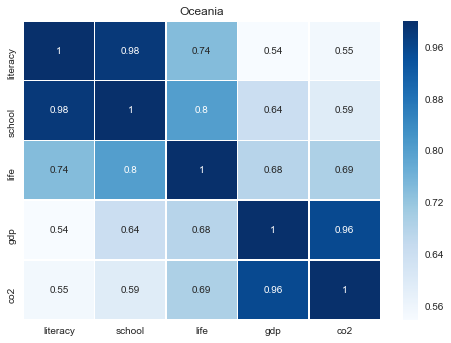

In [29]:
tmp = df.loc[:,['literacy', 'school', 'life', 'region', 'gdp', 'co2']]
regions = tmp['region'].unique()


for i in regions:
    plt.figure()
    plt.title(i)
    tmp_corr = tmp[tmp['region'] == i].corr()
    sns.heatmap(tmp_corr, cmap='Blues', annot=True, linewidth=0.5)

## Se observan las siguientes principales correlaciones por region:
    
 ### En Africa: 
•iteracy  con school 0.78
•co2 con gdp 0.87
•school con gdp 0.6

 ### En america existe fuerte correlación entre 
•GDP y co2 con 0.84
•School y gdp con 0.79
•iteracy con life con 0.68
•school con iteracy 0.78

### En asia:
•GDP con co2 con 0.88
•iteracy con school con 0.78

### en europa:
•GDP con co2 con 0.73
•Life y gdp con 0.74

### En oceania:
•gdp con co2 0.96 
•life con gdp 0.68
school con iteracy 0.98

## Entonces, es posible apreciar que las variables GDP con Co2 se correlacionan en todas las regiones fuertemente.
## Asimismo las variables school con iteracy



# Bonus Points: 

Grafique los diagramas de dispersión para los principales hallazgos¶

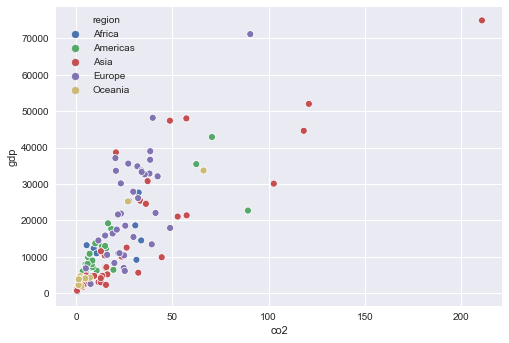

In [31]:
sns.scatterplot(y='gdp', x='co2', hue='region', data=df)

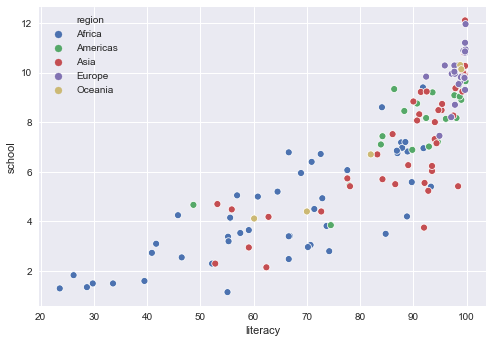

In [32]:
sns.scatterplot(x='literacy', y='school', hue='region', data=df)